In [1]:
import os

import pandas as pd
import geopandas as gpd
import geoplot as gplt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import plotly.express as px

from plotly import graph_objects as go

%matplotlib inline


In [2]:
sciezka_csv = f'{os.getcwd()}\\csv\\złączone\\k\\poprawione\poprawione.csv'
df = pd.read_csv(sciezka_csv)
df.head()

nick  wiek     plec      miejscowosc         wojewodztwo  \
0  grazyna56    65  kobieta            Lipno  kujawsko-pomorskie   
1  JaninaUSA    67  kobieta  Sucha Beskidzka         małopolskie   
2   Belatrix    65  kobieta           Gdańsk           pomorskie   
3   1234elai    66  kobieta           Kraków         małopolskie   
4       bbbb    65  kobieta            Radom         mazowieckie   

                                            wartosci znak_zodiaku  \
0                         wyznanie rzymskokatolickie        panna   
1                                                NaN   koziorożec   
2  wyznanie rzymskokatolickie, małżeństwo mnie ni...       wodnik   
3                         wyznanie rzymskokatolickie          lew   
4                     małżeństwo mnie nie interesuje       wodnik   

                    alkohol                        papierosy  \
0                  obojętny  nie palę i nie toleruję palaczy   
1                       NaN                              NaN   
2  lubię tylko okazjonalnie  nie palę i nie toleruję palaczy   
3  lubię tylko okazjonalnie                         obojętny   
4  lubię tylko okazjonalnie                         obojętny   

                        jezyki  ... jezyk_polski jezyk_angielski  \
0                       polski  ...            1               0   
1                       polski  ...            1               0   
2  polski, angielski, rosyjski  ...            1               1   
3                       polski  ...            1               0   
4                       polski  ...            1               0   

  jezyk_rosyjski jezyk_niemiecki jezyk_włoski  jezyk_hiszpański jezyk_inny  \
0              0               0            0                 0          0   
1              0               0            0                 0          0   
2              1               0            0                 0          0   
3              0               0            0                 0          0   
4              0               0            0                 0          0   

  jezyk_francuski jezyk_portugalski jezyk_ukraiński  
0               0                 0               0  
1               0                 0               0  
2               0                 0               0  
3               0                 0               0  
4               0                 0               0  

[5 rows x 36 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66769 entries, 0 to 66768
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   nick                         66769 non-null  object
 1   wiek                         66769 non-null  int64 
 2   plec                         66769 non-null  object
 3   miejscowosc                  66769 non-null  object
 4   wojewodztwo                  66769 non-null  object
 5   wartosci                     47813 non-null  object
 6   znak_zodiaku                 66757 non-null  object
 7   alkohol                      53226 non-null  object
 8   papierosy                    53286 non-null  object
 9   jezyki                       62773 non-null  object
 10  o_mnie                       66748 non-null  object
 11  osobowosc                    47865 non-null  object
 12  szukam                       60658 non-null  object
 13  zainteresowania              50

In [4]:
df.describe()

wiek        wzrost  jezyk_polski  jezyk_angielski  \
count  66769.00000  66769.000000  66769.000000     66769.000000   
mean      43.77217    165.877533      0.915260         0.191811   
std       12.05101      5.860395      0.278496         0.393728   
min       16.00000    140.000000      0.000000         0.000000   
25%       35.00000    162.000000      1.000000         0.000000   
50%       43.00000    165.000000      1.000000         0.000000   
75%       52.00000    170.000000      1.000000         0.000000   
max       99.00000    210.000000      1.000000         1.000000   

       jezyk_rosyjski  jezyk_niemiecki  jezyk_włoski  jezyk_hiszpański  \
count    66769.000000     66769.000000  66769.000000      66769.000000   
mean         0.055265         0.065285      0.014258          0.012296   
std          0.228499         0.247030      0.118554          0.110205   
min          0.000000         0.000000      0.000000          0.000000   
25%          0.000000         0.000000      0.000000          0.000000   
50%          0.000000         0.000000      0.000000          0.000000   
75%          0.000000         0.000000      0.000000          0.000000   
max          1.000000         1.000000      1.000000          1.000000   

         jezyk_inny  jezyk_francuski  jezyk_portugalski  jezyk_ukraiński  
count  66769.000000     66769.000000       66769.000000     66769.000000  
mean       0.015172         0.015247           0.000854         0.002906  
std        0.122236         0.122533           0.029206         0.053825  
min        0.000000         0.000000           0.000000         0.000000  
25%        0.000000         0.000000           0.000000         0.000000  
50%        0.000000         0.000000           0.000000         0.000000  
75%        0.000000         0.000000           0.000000         0.000000  
max        1.000000         1.000000           1.000000         1.000000

1. **Wiek**

Może zacznijmy od wieku?

Już po danych liczbowych widać, że średnia wieku wynosi prawie 44 lata, z odchyleniem standardowym wynoszącym 12 lat. Minimalny wiek to 16 lat, a maksymalny 99 (ale to wynika z dostępnych danych, więc było do przewidzenia)

C:\Users\Mariusz\miniconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wiek', ylabel='Density'>

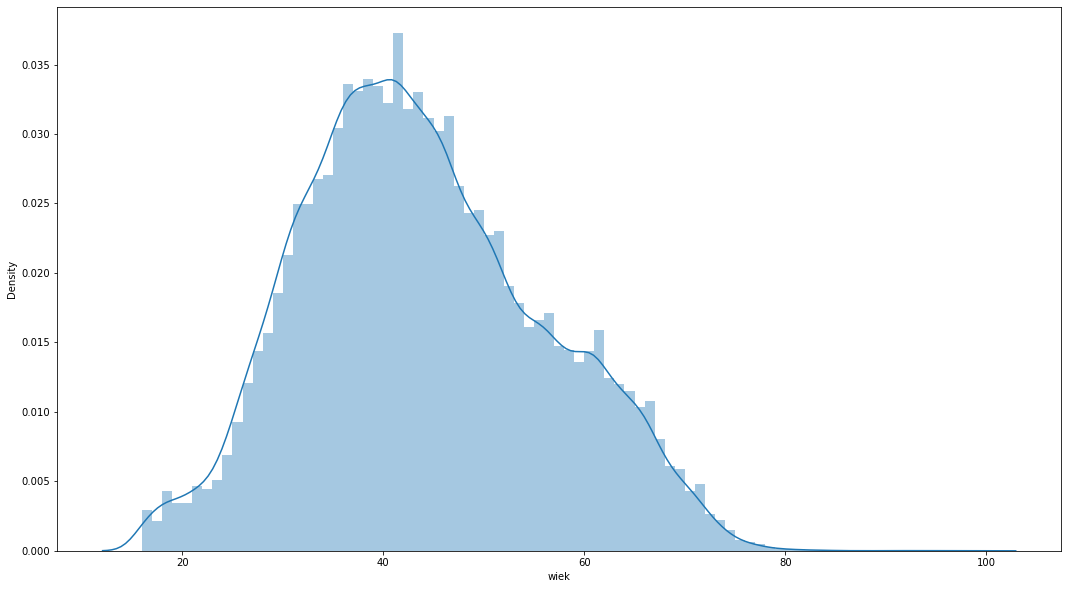

In [5]:
plt.figure(figsize=(18,10))
sns.distplot(df['wiek'], bins=(99-16))

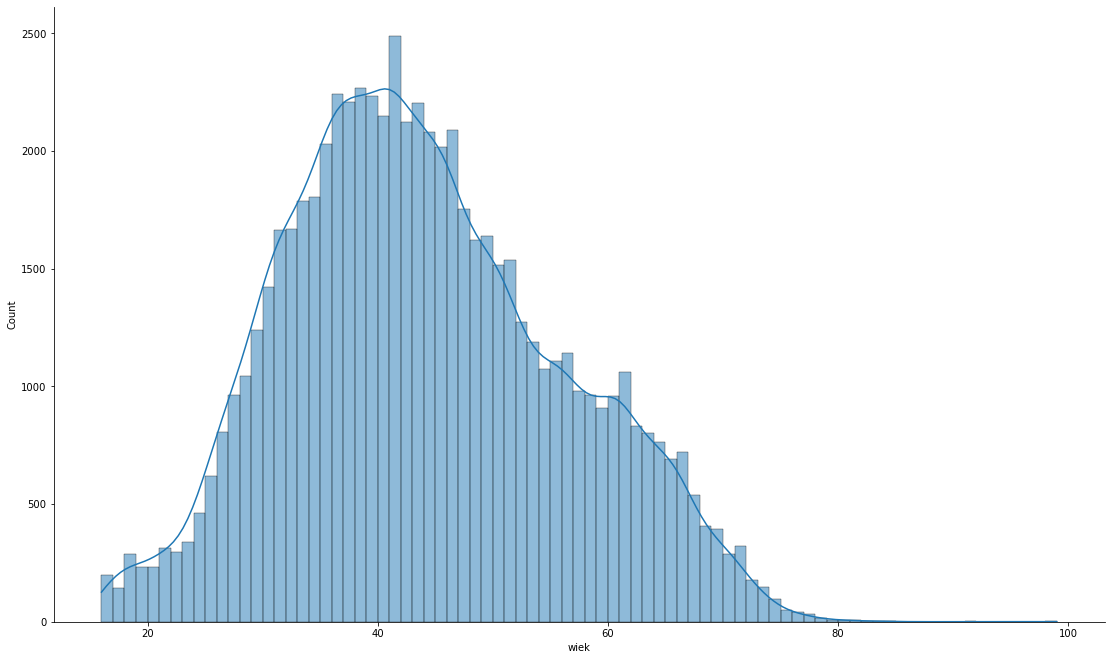

In [6]:
d = sns.displot(df['wiek'], kde=True, bins=(99-16))
d.fig.set_size_inches(18,10)

2. **Województwa**

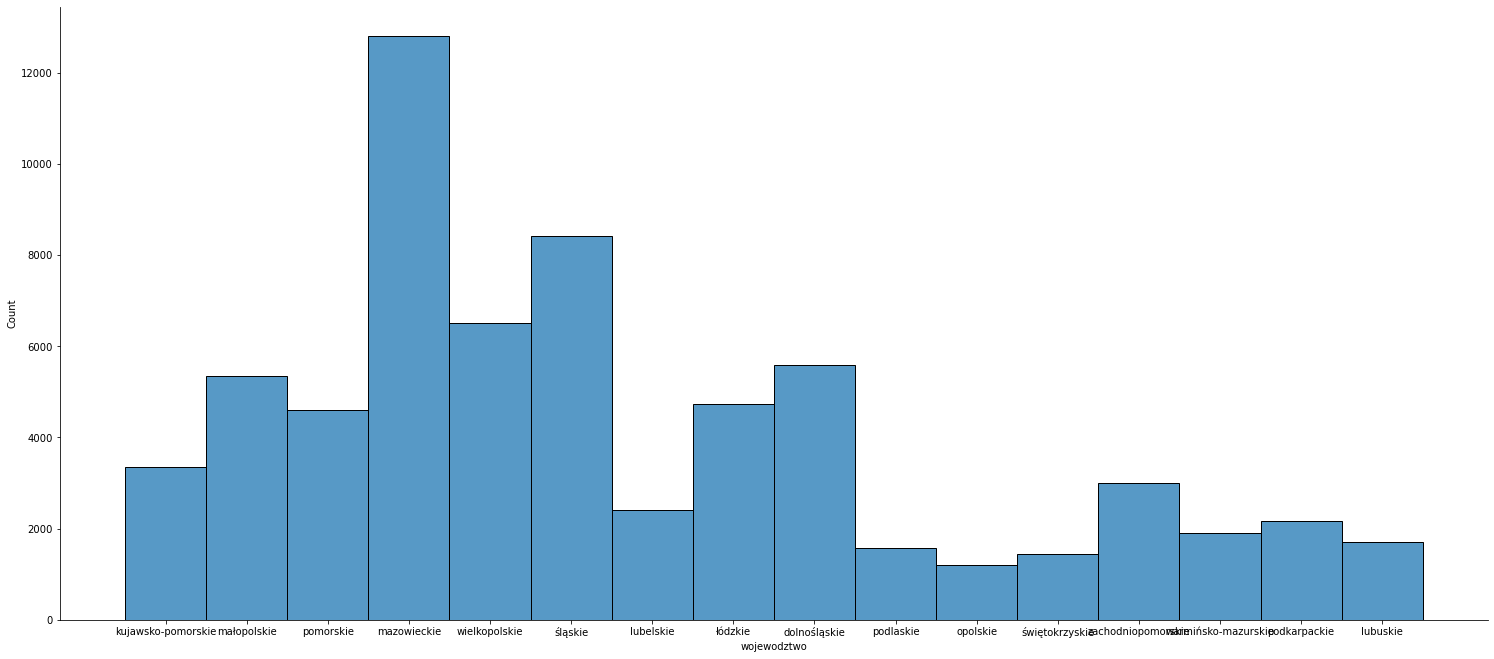

In [7]:
w = sns.displot(df['wojewodztwo'], bins=(16))
w.fig.set_size_inches(25,10)

In [8]:
mapa_woj = gpd.read_file(f'{os.getcwd()}\\mapy\\A01_Granice_wojewodztw.shp', encoding='utf-8')
mapa_woj.head()

JPT_SJR_KO  JPT_POWIER JPT_KOD_JE      JPT_NAZWA_ JPT_ORGAN_  JPT_JOR_ID  \
0        WOJ   3555920.0         14     mazowieckie       None           0   
1        WOJ   1171136.0         26  świętokrzyskie       None           0   
2        WOJ   1831001.0         22       pomorskie       None           0   
3        WOJ   1994777.0         02    dolnośląskie       None           0   
4        WOJ   2018598.0         20       podlaskie       None           0   

    WERSJA_OD WERSJA_DO    WAZNY_OD WAZNY_DO  ... ID_BUFOR_1   JPT_ID  \
0  2021-06-02      None  2012-09-26     None  ...          0  1360387   
1  2012-09-26      None  2012-09-26     None  ...          0   829374   
2  2020-04-09      None  2012-09-26     None  ...          0  1358902   
3  2021-07-23      None  2012-09-26     None  ...          0  1360877   
4  2019-03-21      None  2012-09-26     None  ...          0  1353685   

  JPT_POWI_1 JPT_KJ_I_3  JPT_GEOMET  JPT_GEOM_1  Shape_Leng Shape_Area  \
0        0.0       None         0.0         0.0   20.225774   4.689474   
1        0.0       None         0.0         0.0    9.264959   1.491827   
2        0.0       None         0.0         0.0   13.167595   2.520630   
3        0.0       None         0.0         0.0   13.845851   2.559174   
4        0.0       None         0.0         0.0   11.101166   2.718484   

            REGON                                           geometry  
0  01552891000000  POLYGON ((20.52760 51.46669, 20.52639 51.46841...  
1  29100933700000  POLYGON ((19.70430 50.75239, 19.70443 50.75248...  
2  19167483600000  POLYGON ((17.66483 54.78297, 17.66653 54.78334...  
3  93193464400000  POLYGON ((15.37768 51.51047, 15.37784 51.51065...  
4  05065840400000  POLYGON ((21.98108 52.97859, 21.98078 52.97861...  

[5 rows x 35 columns]

In [9]:
mapa_woj = mapa_woj[['JPT_NAZWA_', "geometry"]]
mapa_woj

JPT_NAZWA_                                           geometry
0           mazowieckie  POLYGON ((20.52760 51.46669, 20.52639 51.46841...
1        świętokrzyskie  POLYGON ((19.70430 50.75239, 19.70443 50.75248...
2             pomorskie  POLYGON ((17.66483 54.78297, 17.66653 54.78334...
3          dolnośląskie  POLYGON ((15.37768 51.51047, 15.37784 51.51065...
4             podlaskie  POLYGON ((21.98108 52.97859, 21.98078 52.97861...
5    zachodniopomorskie  POLYGON ((14.81157 54.04037, 14.89525 54.05570...
6               śląskie  MULTIPOLYGON (((18.06438 50.10357, 18.06633 50...
7              opolskie  POLYGON ((18.06438 50.10357, 18.06361 50.10278...
8              lubuskie  POLYGON ((15.37768 51.51047, 15.37846 51.51025...
9         wielkopolskie  POLYGON ((16.71447 53.29913, 16.71447 53.29920...
10          małopolskie  POLYGON ((21.17981 50.07818, 21.17984 50.07800...
11              łódzkie  POLYGON ((20.52760 51.46669, 20.52766 51.46633...
12  warmińsko-mazurskie  POLYGON ((21.55932 54.32250, 21.55939 54.32250...
13   kujawsko-pomorskie  POLYGON ((17.65670 53.57115, 17.65672 53.57115...
14            lubelskie  POLYGON ((22.46031 50.59093, 22.45996 50.59086...
15         podkarpackie  POLYGON ((22.46031 50.59093, 22.46079 50.59103...

In [10]:
gr_woj = df.groupby('wojewodztwo', as_index=False).count()
gr_woj

wojewodztwo   nick   wiek   plec  miejscowosc  wartosci  \
0          dolnośląskie   5596   5596   5596         5596      3903   
1    kujawsko-pomorskie   3363   3363   3363         3363      2377   
2             lubelskie   2416   2416   2416         2416      1760   
3              lubuskie   1696   1696   1696         1696      1207   
4           mazowieckie  12804  12804  12804        12804      9382   
5           małopolskie   5351   5351   5351         5351      3844   
6              opolskie   1209   1209   1209         1209       876   
7          podkarpackie   2165   2165   2165         2165      1548   
8             podlaskie   1572   1572   1572         1572      1170   
9             pomorskie   4603   4603   4603         4603      3273   
10  warmińsko-mazurskie   1896   1896   1896         1896      1346   
11        wielkopolskie   6514   6514   6514         6514      4612   
12   zachodniopomorskie   2994   2994   2994         2994      2090   
13              łódzkie   4734   4734   4734         4734      3390   
14              śląskie   8410   8410   8410         8410      6024   
15       świętokrzyskie   1446   1446   1446         1446      1011   

    znak_zodiaku  alkohol  papierosy  jezyki  ...  jezyk_polski  \
0           5596     4509       4506    5261  ...          5596   
1           3361     2641       2629    3177  ...          3363   
2           2416     1899       1892    2271  ...          2416   
3           1696     1353       1339    1612  ...          1696   
4          12802    10294      10319   12018  ...         12804   
5           5351     4199       4219    5038  ...          5351   
6           1209      966        964    1140  ...          1209   
7           2165     1669       1650    2017  ...          2165   
8           1570     1198       1204    1456  ...          1572   
9           4603     3692       3707    4342  ...          4603   
10          1896     1484       1488    1799  ...          1896   
11          6512     5142       5185    6134  ...          6514   
12          2992     2396       2407    2823  ...          2994   
13          4734     3783       3781    4417  ...          4734   
14          8409     6860       6861    7924  ...          8410   
15          1445     1141       1135    1344  ...          1446   

    jezyk_angielski  jezyk_rosyjski  jezyk_niemiecki  jezyk_włoski  \
0              5596            5596             5596          5596   
1              3363            3363             3363          3363   
2              2416            2416             2416          2416   
3              1696            1696             1696          1696   
4             12804           12804            12804         12804   
5              5351            5351             5351          5351   
6              1209            1209             1209          1209   
7              2165            2165             2165          2165   
8              1572            1572             1572          1572   
9              4603            4603             4603          4603   
10             1896            1896             1896          1896   
11             6514            6514             6514          6514   
12             2994            2994             2994          2994   
13             4734            4734             4734          4734   
14             8410            8410             8410          8410   
15             1446            1446             1446          1446   

    jezyk_hiszpański  jezyk_inny  jezyk_francuski  jezyk_portugalski  \
0               5596        5596             5596               5596   
1               3363        3363             3363               3363   
2               2416        2416             2416               2416   
3               1696        1696             1696               1696   
4              12804       12804            12804              12804   
5               5351        5351         

In [11]:
dane_mapa_woj = pd.merge(mapa_woj, gr_woj, how='left', left_on='JPT_NAZWA_', right_on='wojewodztwo')
dane_mapa_woj

JPT_NAZWA_                                           geometry  \
0           mazowieckie  POLYGON ((20.52760 51.46669, 20.52639 51.46841...   
1        świętokrzyskie  POLYGON ((19.70430 50.75239, 19.70443 50.75248...   
2             pomorskie  POLYGON ((17.66483 54.78297, 17.66653 54.78334...   
3          dolnośląskie  POLYGON ((15.37768 51.51047, 15.37784 51.51065...   
4             podlaskie  POLYGON ((21.98108 52.97859, 21.98078 52.97861...   
5    zachodniopomorskie  POLYGON ((14.81157 54.04037, 14.89525 54.05570...   
6               śląskie  MULTIPOLYGON (((18.06438 50.10357, 18.06633 50...   
7              opolskie  POLYGON ((18.06438 50.10357, 18.06361 50.10278...   
8              lubuskie  POLYGON ((15.37768 51.51047, 15.37846 51.51025...   
9         wielkopolskie  POLYGON ((16.71447 53.29913, 16.71447 53.29920...   
10          małopolskie  POLYGON ((21.17981 50.07818, 21.17984 50.07800...   
11              łódzkie  POLYGON ((20.52760 51.46669, 20.52766 51.46633...   
12  warmińsko-mazurskie  POLYGON ((21.55932 54.32250, 21.55939 54.32250...   
13   kujawsko-pomorskie  POLYGON ((17.65670 53.57115, 17.65672 53.57115...   
14            lubelskie  POLYGON ((22.46031 50.59093, 22.45996 50.59086...   
15         podkarpackie  POLYGON ((22.46031 50.59093, 22.46079 50.59103...   

            wojewodztwo   nick   wiek   plec  miejscowosc  wartosci  \
0           mazowieckie  12804  12804  12804        12804      9382   
1        świętokrzyskie   1446   1446   1446         1446      1011   
2             pomorskie   4603   4603   4603         4603      3273   
3          dolnośląskie   5596   5596   5596         5596      3903   
4             podlaskie   1572   1572   1572         1572      1170   
5    zachodniopomorskie   2994   2994   2994         2994      2090   
6               śląskie   8410   8410   8410         8410      6024   
7              opolskie   1209   1209   1209         1209       876   
8              lubuskie   1696   1696   1696         1696      1207   
9         wielkopolskie   6514   6514   6514         6514      4612   
10          małopolskie   5351   5351   5351         5351      3844   
11              łódzkie   4734   4734   4734         4734      3390   
12  warmińsko-mazurskie   1896   1896   1896         1896      1346   
13   kujawsko-pomorskie   3363   3363   3363         3363      2377   
14            lubelskie   2416   2416   2416         2416      1760   
15         podkarpackie   2165   2165   2165         2165      1548   

    znak_zodiaku  alkohol  ...  jezyk_polski  jezyk_angielski  jezyk_rosyjski  \
0          12802    10294  ...         12804            12804           12804   
1           1445     1141  ...          1446             1446            1446   
2           4603     3692  ...          4603             4603            4603   
3           5596     4509  ...          5596             5596            5596   
4           1570     1198  ...          1572             1572            1572   
5           2992     2396  ...          2994             2994            2994   
6           8409     6860  ...          8410             8410            8410   
7           1209      966  ...          1209             1209            1209   
8           1696     1353  ...          1696             1696            1696   
9           6512     5142  ...          6514             6514            6514   
10          5351     4199  ...          5351             5351            5351   
11          4734     3783  ...          4734             4734            4734   
12          1896     1484  ...          1896             1896            1896   
13          3361     2641  ...          3363             3363            3363   
14          2416     1899  ...          2416             2416            2416   
15          2165     1669  ...          2165             2165            2165   

    jezyk_niemiecki  jezyk_włoski  jezyk_hiszpański  jezyk_inny  \
0             12804         12804

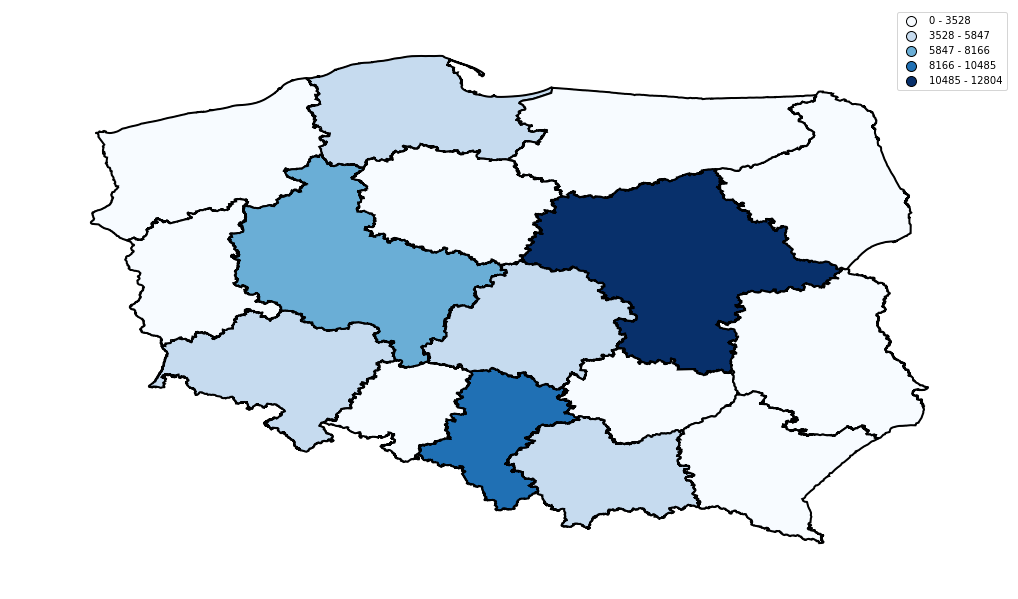

In [12]:

ax = gplt.polyplot(dane_mapa_woj, figsize=(18, 18))
gplt.choropleth(dane_mapa_woj, 
                hue='nick',
                edgecolor="black",
                linewidth=2,
                cmap="Blues",
                legend=True,
                scheme="EqualInterval",
                ax=ax);


# scheme=None—A continuous colormap.

# scheme=”Quantiles”—Bins the data such that the bins contain equal numbers of samples.

# scheme=”EqualInterval”—Bins the data such that bins are of equal length.

# scheme=”FisherJenks”—Bins the data using the Fisher natural breaks optimization procedure.

# cmaps['Perceptually Uniform Sequential'] = [
#             'viridis', 'plasma', 'inferno', 'magma', 'cividis']

# cmaps['Sequential'] = [
#             'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#             'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
# cmaps['Sequential (2)'] = [
#             'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
#             'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
#             'hot', 'afmhot', 'gist_heat', 'copper']



In [13]:
# fig = px.choropleth(dane_mapa_woj, geojson=dane_mapa_woj.geometry, 
#                     locations=dane_mapa_woj.index, color="nick",
#                     height=500,
#                    color_continuous_scale="Blues")
# fig.update_geos(fitbounds="locations", visible=True)
# fig.update_layout(
#     title_text='Map'
# )
# fig.update(layout = dict(title=dict(x=0.5)))
# fig.update_layout(
#     margin={"r":0,"t":30,"l":10,"b":10},
#     coloraxis_colorbar={
#         'title':'Sum'})
# fig.show()

In [14]:
dane_mapa_woj['procent_z_calosci'] = round((dane_mapa_woj['nick']/dane_mapa_woj['nick'].sum()) * 100, 2)
dane_mapa_woj

JPT_NAZWA_                                           geometry  \
0           mazowieckie  POLYGON ((20.52760 51.46669, 20.52639 51.46841...   
1        świętokrzyskie  POLYGON ((19.70430 50.75239, 19.70443 50.75248...   
2             pomorskie  POLYGON ((17.66483 54.78297, 17.66653 54.78334...   
3          dolnośląskie  POLYGON ((15.37768 51.51047, 15.37784 51.51065...   
4             podlaskie  POLYGON ((21.98108 52.97859, 21.98078 52.97861...   
5    zachodniopomorskie  POLYGON ((14.81157 54.04037, 14.89525 54.05570...   
6               śląskie  MULTIPOLYGON (((18.06438 50.10357, 18.06633 50...   
7              opolskie  POLYGON ((18.06438 50.10357, 18.06361 50.10278...   
8              lubuskie  POLYGON ((15.37768 51.51047, 15.37846 51.51025...   
9         wielkopolskie  POLYGON ((16.71447 53.29913, 16.71447 53.29920...   
10          małopolskie  POLYGON ((21.17981 50.07818, 21.17984 50.07800...   
11              łódzkie  POLYGON ((20.52760 51.46669, 20.52766 51.46633...   
12  warmińsko-mazurskie  POLYGON ((21.55932 54.32250, 21.55939 54.32250...   
13   kujawsko-pomorskie  POLYGON ((17.65670 53.57115, 17.65672 53.57115...   
14            lubelskie  POLYGON ((22.46031 50.59093, 22.45996 50.59086...   
15         podkarpackie  POLYGON ((22.46031 50.59093, 22.46079 50.59103...   

            wojewodztwo   nick   wiek   plec  miejscowosc  wartosci  \
0           mazowieckie  12804  12804  12804        12804      9382   
1        świętokrzyskie   1446   1446   1446         1446      1011   
2             pomorskie   4603   4603   4603         4603      3273   
3          dolnośląskie   5596   5596   5596         5596      3903   
4             podlaskie   1572   1572   1572         1572      1170   
5    zachodniopomorskie   2994   2994   2994         2994      2090   
6               śląskie   8410   8410   8410         8410      6024   
7              opolskie   1209   1209   1209         1209       876   
8              lubuskie   1696   1696   1696         1696      1207   
9         wielkopolskie   6514   6514   6514         6514      4612   
10          małopolskie   5351   5351   5351         5351      3844   
11              łódzkie   4734   4734   4734         4734      3390   
12  warmińsko-mazurskie   1896   1896   1896         1896      1346   
13   kujawsko-pomorskie   3363   3363   3363         3363      2377   
14            lubelskie   2416   2416   2416         2416      1760   
15         podkarpackie   2165   2165   2165         2165      1548   

    znak_zodiaku  alkohol  ...  jezyk_angielski  jezyk_rosyjski  \
0          12802    10294  ...            12804           12804   
1           1445     1141  ...             1446            1446   
2           4603     3692  ...             4603            4603   
3           5596     4509  ...             5596            5596   
4           1570     1198  ...             1572            1572   
5           2992     2396  ...             2994            2994   
6           8409     6860  ...             8410            8410   
7           1209      966  ...             1209            1209   
8           1696     1353  ...             1696            1696   
9           6512     5142  ...             6514            6514   
10          5351     4199  ...             5351            5351   
11          4734     3783  ...             4734            4734   
12          1896     1484  ...             1896            1896   
13          3361     2641  ...             3363            3363   
14          2416     1899  ...             2416            2416   
15          2165     1669  ...             2165            2165   

    jezyk_niemiecki  jezyk_włoski  jezyk_hiszpański  jezyk_inny  \
0             12804         12804             12804       12804   
1              1446          1446              1446        1446   
2              4603          4603              4603        4603   
3              5596          5596              5596        5596   
4  

In [15]:
dane_mapa_woj.sort_values(by='nick', ascending=False)

JPT_NAZWA_                                           geometry  \
0           mazowieckie  POLYGON ((20.52760 51.46669, 20.52639 51.46841...   
6               śląskie  MULTIPOLYGON (((18.06438 50.10357, 18.06633 50...   
9         wielkopolskie  POLYGON ((16.71447 53.29913, 16.71447 53.29920...   
3          dolnośląskie  POLYGON ((15.37768 51.51047, 15.37784 51.51065...   
10          małopolskie  POLYGON ((21.17981 50.07818, 21.17984 50.07800...   
11              łódzkie  POLYGON ((20.52760 51.46669, 20.52766 51.46633...   
2             pomorskie  POLYGON ((17.66483 54.78297, 17.66653 54.78334...   
13   kujawsko-pomorskie  POLYGON ((17.65670 53.57115, 17.65672 53.57115...   
5    zachodniopomorskie  POLYGON ((14.81157 54.04037, 14.89525 54.05570...   
14            lubelskie  POLYGON ((22.46031 50.59093, 22.45996 50.59086...   
15         podkarpackie  POLYGON ((22.46031 50.59093, 22.46079 50.59103...   
12  warmińsko-mazurskie  POLYGON ((21.55932 54.32250, 21.55939 54.32250...   
8              lubuskie  POLYGON ((15.37768 51.51047, 15.37846 51.51025...   
4             podlaskie  POLYGON ((21.98108 52.97859, 21.98078 52.97861...   
1        świętokrzyskie  POLYGON ((19.70430 50.75239, 19.70443 50.75248...   
7              opolskie  POLYGON ((18.06438 50.10357, 18.06361 50.10278...   

            wojewodztwo   nick   wiek   plec  miejscowosc  wartosci  \
0           mazowieckie  12804  12804  12804        12804      9382   
6               śląskie   8410   8410   8410         8410      6024   
9         wielkopolskie   6514   6514   6514         6514      4612   
3          dolnośląskie   5596   5596   5596         5596      3903   
10          małopolskie   5351   5351   5351         5351      3844   
11              łódzkie   4734   4734   4734         4734      3390   
2             pomorskie   4603   4603   4603         4603      3273   
13   kujawsko-pomorskie   3363   3363   3363         3363      2377   
5    zachodniopomorskie   2994   2994   2994         2994      2090   
14            lubelskie   2416   2416   2416         2416      1760   
15         podkarpackie   2165   2165   2165         2165      1548   
12  warmińsko-mazurskie   1896   1896   1896         1896      1346   
8              lubuskie   1696   1696   1696         1696      1207   
4             podlaskie   1572   1572   1572         1572      1170   
1        świętokrzyskie   1446   1446   1446         1446      1011   
7              opolskie   1209   1209   1209         1209       876   

    znak_zodiaku  alkohol  ...  jezyk_angielski  jezyk_rosyjski  \
0          12802    10294  ...            12804           12804   
6           8409     6860  ...             8410            8410   
9           6512     5142  ...             6514            6514   
3           5596     4509  ...             5596            5596   
10          5351     4199  ...             5351            5351   
11          4734     3783  ...             4734            4734   
2           4603     3692  ...             4603            4603   
13          3361     2641  ...             3363            3363   
5           2992     2396  ...             2994            2994   
14          2416     1899  ...             2416            2416   
15          2165     1669  ...             2165            2165   
12          1896     1484  ...             1896            1896   
8           1696     1353  ...             1696            1696   
4           1570     1198  ...             1572            1572   
1           1445     1141  ...             1446            1446   
7           1209      966  ...             1209            1209   

    jezyk_niemiecki  jezyk_włoski  jezyk_hiszpański  jezyk_inny  \
0             12804         12804             12804       12804   
6              8410          8410              8410        8410   
9              6514          6514              6514        6514   
3              5596          5596              5596        5596   
10 

Najwięcej użytkowników jest z województw: mazowieckiego, śląskiego i wielkopolskiego

Na drugim biegunie znajdują się województwa opolskie, świętokrzyskie i podlaskie

In [16]:
pv_woj_wiek = df.pivot_table(index='wojewodztwo', values=['wiek']).sort_values(by='wiek', ascending=False)
pv_woj_wiek

wiek
wojewodztwo                   
zachodniopomorskie   46.082832
warmińsko-mazurskie  45.184599
lubuskie             45.058962
opolskie             44.852771
kujawsko-pomorskie   44.484984
pomorskie            44.367152
łódzkie              44.247782
dolnośląskie         44.210329
świętokrzyskie       44.075380
śląskie              44.064209
podlaskie            43.722646
wielkopolskie        43.536383
lubelskie            43.265728
mazowieckie          42.895267
małopolskie          42.250047
podkarpackie         42.105312

In [17]:
mapa_woj_wiek = pd.merge(mapa_woj, pv_woj_wiek, how='left', left_on='JPT_NAZWA_', right_on='wojewodztwo')
mapa_woj_wiek

JPT_NAZWA_                                           geometry  \
0           mazowieckie  POLYGON ((20.52760 51.46669, 20.52639 51.46841...   
1        świętokrzyskie  POLYGON ((19.70430 50.75239, 19.70443 50.75248...   
2             pomorskie  POLYGON ((17.66483 54.78297, 17.66653 54.78334...   
3          dolnośląskie  POLYGON ((15.37768 51.51047, 15.37784 51.51065...   
4             podlaskie  POLYGON ((21.98108 52.97859, 21.98078 52.97861...   
5    zachodniopomorskie  POLYGON ((14.81157 54.04037, 14.89525 54.05570...   
6               śląskie  MULTIPOLYGON (((18.06438 50.10357, 18.06633 50...   
7              opolskie  POLYGON ((18.06438 50.10357, 18.06361 50.10278...   
8              lubuskie  POLYGON ((15.37768 51.51047, 15.37846 51.51025...   
9         wielkopolskie  POLYGON ((16.71447 53.29913, 16.71447 53.29920...   
10          małopolskie  POLYGON ((21.17981 50.07818, 21.17984 50.07800...   
11              łódzkie  POLYGON ((20.52760 51.46669, 20.52766 51.46633...   
12  warmińsko-mazurskie  POLYGON ((21.55932 54.32250, 21.55939 54.32250...   
13   kujawsko-pomorskie  POLYGON ((17.65670 53.57115, 17.65672 53.57115...   
14            lubelskie  POLYGON ((22.46031 50.59093, 22.45996 50.59086...   
15         podkarpackie  POLYGON ((22.46031 50.59093, 22.46079 50.59103...   

         wiek  
0   42.895267  
1   44.075380  
2   44.367152  
3   44.210329  
4   43.722646  
5   46.082832  
6   44.064209  
7   44.852771  
8   45.058962  
9   43.536383  
10  42.250047  
11  44.247782  
12  45.184599  
13  44.484984  
14  43.265728  
15  42.105312

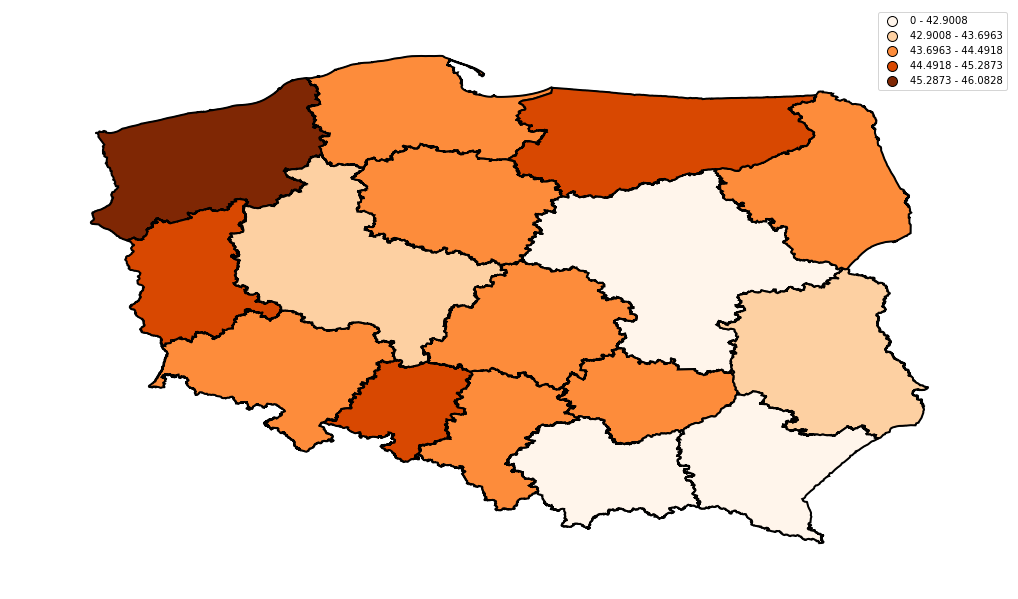

In [18]:
ax = gplt.polyplot(mapa_woj_wiek, figsize=(18, 18))
gplt.choropleth(mapa_woj_wiek, 
                hue='wiek',
                edgecolor="black",
                linewidth=2,
                cmap="Oranges",
                legend=True,
                scheme="EqualInterval",
                ax=ax);

W województwie zachodniopomorskim jest najstarsza średnia wieku. Z drugiej strony w podkarpackim jest najniższa. Różnica nie jest dużą wynosi ok 4 lata

3. **Znak zodiaku**

In [19]:
gb_woj_zz = df.groupby(['wojewodztwo'])['znak_zodiaku'].agg(pd.Series.mode).to_frame()
gb_woj_zz

znak_zodiaku
wojewodztwo                           
dolnośląskie                       byk
kujawsko-pomorskie                 byk
lubelskie                        baran
lubuskie                     bliźnięta
mazowieckie                  bliźnięta
małopolskie                        byk
opolskie                           byk
podkarpackie                 bliźnięta
podlaskie                        baran
pomorskie                          byk
warmińsko-mazurskie              baran
wielkopolskie             [baran, byk]
zachodniopomorskie   [koziorożec, rak]
łódzkie                            byk
śląskie                            byk
świętokrzyskie                     byk

In [20]:
df['znak_zodiaku'].value_counts()

byk           6383
bliźnięta     6123
baran         6086
koziorożec    6048
rak           5868
ryby          5825
wodnik        5558
lew           5459
panna         5100
waga          5026
strzelec      4864
skorpion      4417
Name: znak_zodiaku, dtype: int64

Najwięcej kont posiadają kobiety spod znaku byka, a z drugiej strony najmniej spod znaku skorpiona

In [21]:
df.columns

Index(['nick', 'wiek', 'plec', 'miejscowosc', 'wojewodztwo', 'wartosci',
       'znak_zodiaku', 'alkohol', 'papierosy', 'jezyki', 'o_mnie', 'osobowosc',
       'szukam', 'zainteresowania', 'moj_wymarzony_partner', 'wzrost',
       'budowa_ciala', 'wlosy', 'kolor_oczu', 'zawod', 'wyksztalcenie',
       'stan_cywilny', 'ma_dzieci', 'chce_dzieci', 'wyznanie',
       'zainteresowanie_malzenstwem', 'jezyk_polski', 'jezyk_angielski',
       'jezyk_rosyjski', 'jezyk_niemiecki', 'jezyk_włoski', 'jezyk_hiszpański',
       'jezyk_inny', 'jezyk_francuski', 'jezyk_portugalski',
       'jezyk_ukraiński'],
      dtype='object')

4. **Alkohol**

In [22]:
df['alkohol'].unique()

array(['obojętny', nan, 'lubię tylko okazjonalnie', 'nie lubię',
       'nie piję, ale toleruję osoby pijące alkohol', 'lubię',
       'nie piję i nie toleruję osób pijących alkohol'], dtype=object)

In [23]:
df['alkohol'].value_counts()

lubię tylko okazjonalnie                         36717
obojętny                                          7592
nie lubię                                         5433
lubię                                             1584
nie piję, ale toleruję osoby pijące alkohol       1208
nie piję i nie toleruję osób pijących alkohol      692
Name: alkohol, dtype: int64

Widać, że zdecydowana większość lubiu alkohol tylko okazjonalnie

5. **papierosy**

In [24]:
df['papierosy'].value_counts()

nie przepadam                      22449
obojętny                            9039
nie palę i nie toleruję palaczy     8027
nie palę, ale toleruję palaczy      7278
palę                                2394
lubię                               2161
palę okazjonalnie                   1938
Name: papierosy, dtype: int64

Podobnie jest z papierosami

6. **Języki**

In [25]:
lista_jezykow = ['polski',
 'angielski',
 'rosyjski',
 'niemiecki',
 'włoski',
 'hiszpański',
 'inny',
 'francuski',
 'portugalski',
 'ukraiński']
df.columns

Index(['nick', 'wiek', 'plec', 'miejscowosc', 'wojewodztwo', 'wartosci',
       'znak_zodiaku', 'alkohol', 'papierosy', 'jezyki', 'o_mnie', 'osobowosc',
       'szukam', 'zainteresowania', 'moj_wymarzony_partner', 'wzrost',
       'budowa_ciala', 'wlosy', 'kolor_oczu', 'zawod', 'wyksztalcenie',
       'stan_cywilny', 'ma_dzieci', 'chce_dzieci', 'wyznanie',
       'zainteresowanie_malzenstwem', 'jezyk_polski', 'jezyk_angielski',
       'jezyk_rosyjski', 'jezyk_niemiecki', 'jezyk_włoski', 'jezyk_hiszpański',
       'jezyk_inny', 'jezyk_francuski', 'jezyk_portugalski',
       'jezyk_ukraiński'],
      dtype='object')

In [26]:
for jezyk in lista_jezykow:
    print(f"jezyk {jezyk} znają: {df['jezyk_{}'.format(jezyk)].sum()} osoby")

jezyk polski znają: 61111 osoby
jezyk angielski znają: 12807 osoby
jezyk rosyjski znają: 3690 osoby
jezyk niemiecki znają: 4359 osoby
jezyk włoski znają: 952 osoby
jezyk hiszpański znają: 821 osoby
jezyk inny znają: 1013 osoby
jezyk francuski znają: 1018 osoby
jezyk portugalski znają: 57 osoby
jezyk ukraiński znają: 194 osoby


Język polski zna znakomita większość, dziwi mnie jednak słaba znajomość jezyków obcych

7. **Wzrost**

In [27]:
df['wzrost'].describe()

count    66769.000000
mean       165.877533
std          5.860395
min        140.000000
25%        162.000000
50%        165.000000
75%        170.000000
max        210.000000
Name: wzrost, dtype: float64

Średni wzrost wynosi prawie 166 cm, przy odchyleniu standardowym prawie 6 cm.
WIęcej zależności wzrostu do innych wartości sprawdzę później

8. **Budowa ciała**

In [28]:
df['budowa_ciala'].unique()

array(['normalna budowa ciała', nan, 'szczupła budowa ciała',
       'lekko puszysta budowa ciała', 'puszysta budowa ciała',
       'muskularna budowa ciała'], dtype=object)

In [29]:
df.budowa_ciala.value_counts()

normalna budowa ciała          29181
szczupła budowa ciała          14132
lekko puszysta budowa ciała     4977
puszysta budowa ciała           2327
muskularna budowa ciała           65
Name: budowa_ciala, dtype: int64

In [30]:
gb_wzrost_bc = df.groupby(['budowa_ciala'])['wzrost'].agg(pd.Series.mode).to_frame()
gb_wzrost_bc

wzrost
budowa_ciala                       
lekko puszysta budowa ciała     160
muskularna budowa ciała         165
normalna budowa ciała           164
puszysta budowa ciała           170
szczupła budowa ciała           170

9. **Włosy**

In [31]:
df['wlosy'].unique()

array(['włosy białe/siwe', nan, 'włosy jasny blond',
       'włosy ciemne kasztanowe', 'włosy ciemny blond', 'włosy brązowe',
       'włosy jasne kasztanowe', 'włosy ciemne rude', 'włosy czarne',
       'włosy ciemne miedziane', 'włosy jasne miedziane',
       'włosy jasne rude', 'włosy różnokolorowe', 'nie mam włosów'],
      dtype=object)

In [32]:
df['wlosy'].value_counts()

włosy jasny blond          15513
włosy ciemny blond         12232
włosy ciemne kasztanowe     8454
włosy brązowe               4445
włosy czarne                4313
włosy jasne kasztanowe      2044
włosy ciemne miedziane      1312
włosy jasne miedziane        863
włosy różnokolorowe          530
włosy białe/siwe             522
włosy ciemne rude            287
włosy jasne rude             198
nie mam włosów                18
Name: wlosy, dtype: int64

10. **Kolor oczu**

In [35]:
df.kolor_oczu.value_counts()

niebieskie oczy     18661
zielone oczy        12521
piwne oczy           8978
brązowe oczy         5046
szare oczy           4142
czarne oczy           599
różnobarwne oczy      382
bursztynowe oczy      158
Name: kolor_oczu, dtype: int64

11. **Zawód**

In [38]:
df.zawod.unique()

array([nan, 'inny zawód', 'emeryt / rencista',
       'pracownik naukowy / nauczyciel', 'pracownik biurowy / urzędnik',
       'student / uczeń', 'właściciel', 'pracownik usług i handlu',
       'specjalista / wolny zawód', 'pracownik fizyczny',
       'własna działalność', 'zarząd / dyrektor',
       'niepracujący / szukający pracy',
       'pracownik marketingu / reklamy / PR'], dtype=object)

In [39]:
df['zawod'].value_counts()

inny zawód                             9625
pracownik biurowy / urzędnik           9066
specjalista / wolny zawód              5054
pracownik usług i handlu               2932
emeryt / rencista                      2642
pracownik naukowy / nauczyciel         2203
pracownik fizyczny                     1634
właściciel                             1562
własna działalność                     1122
student / uczeń                         836
pracownik marketingu / reklamy / PR     570
zarząd / dyrektor                       314
niepracujący / szukający pracy          263
Name: zawod, dtype: int64

12. **Wykształcenie**

In [40]:
df.wyksztalcenie.unique()

array([nan, 'wykształcenie podyplomowe', 'wykształcenie zawodowe',
       'wykształcenie średnie', 'wykształcenie wyższe',
       'wykształcenie licencjat', 'wykształcenie wyższe niepełne',
       'wykształcenie pomaturalne', 'wykształcenie podstawowe'],
      dtype=object)

In [41]:
df.wyksztalcenie.value_counts()

wykształcenie wyższe             21334
wykształcenie średnie            11878
wykształcenie podyplomowe         4511
wykształcenie licencjat           3069
wykształcenie pomaturalne         3029
wykształcenie zawodowe            1896
wykształcenie wyższe niepełne     1338
wykształcenie podstawowe           219
Name: wyksztalcenie, dtype: int64